In [1]:
# from sklearn.datasets.samples_generator import make_blobs
import scipy.io
import csv
import os
import numpy as np
import random as rn
import operator

In [2]:
#Reference:
#   https://support.10xgenomics.com/single-cell/software/pipelines/latest/output/matrices
#   On how to process single cell output matrice on python

genome = "hg19"
matrices_dir = "./PCA/filtered_gene_bc_matrices"
human_matrix_dir = os.path.join(matrices_dir, genome)
mat = scipy.io.mmread(os.path.join(human_matrix_dir, "matrix.mtx"))

genes_path = os.path.join(human_matrix_dir, "genes.tsv")
gene_ids = np.array([row[0] for row in csv.reader(open(genes_path), delimiter="\t")])
gene_names = np.array([row[1] for row in csv.reader(open(genes_path), delimiter="\t")])
gene_ids_names = np.matrix([row for row in csv.reader(open(genes_path), delimiter="\t")])

barcodes_path = os.path.join(human_matrix_dir, "barcodes.tsv")
barcodes = np.array([row[0] for row in csv.reader(open(barcodes_path), delimiter="\t")])

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.random_projection import sparse_random_matrix

In [64]:
def plot_pca_weights(pca):
    shape = pca.components_.shape
    components = shape[0]    
    number_of_features = shape[1]
    principal_components = {}
    for x in range(components):
        unsorted_features = {k: pca.components_[x][k] for k in range(number_of_features)}
        sorted_features = sorted(unsorted_features.items(), key=operator.itemgetter(1), reverse=True)
        principal_components.setdefault("PCA {}".format(x+1), sorted_features)

    list_of_components = []
    for i in range(components):
        temp_dict = principal_components["PCA {}".format(i+1)]
        list_of_components.append([temp_dict[j] for j in range(10)])
    
    tags = [list_of_components[0][k][0] for k in range(10)]
    weights = [list_of_components[0][k][1] for k in range(10)]
    tags = get_tags(tags)
    
    
#     //////////
    plt.rcdefaults()
    fig, ax = plt.subplots()

    # Example data

    y_pos = np.arange(len(tags))
    # performance = 3 + 10 * np.random.rand(len(people))
    error = np.random.rand(len(tags))

    ax.barh(y_pos, weights, xerr=error, align='center',
            color='green', ecolor='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(tags)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Density')
    ax.set_title('PCA 1')

    plt.show()
#   //////////
#     fig, ax = plt.subplots()
#     ax.plot(weights, linewidth=4)
#     ax.set_xlim(0, 10)
#     ax.set_xticklabels(tags)
#     plt.show()
#     print tags

In [26]:
def run_pca(matrix_data, components = 10, svd_solver='randomized'):
    X_mat = matrix_data.todense()
    X_mat = X_mat.transpose()
    pca = PCA(copy=True, iterated_power='auto', n_components=components, random_state=None,
              svd_solver=svd_solver, tol=0.0, whiten=False)
    pca.fit(X_mat)
    plot_pca_weights(pca)


    return pca, np.dot(X_mat, pca.components_.transpose())


def get_tags(list_of_indexes):
    tags = []
    for tag in list_of_indexes:
        tags.append(gene_names[tag])
    return tags

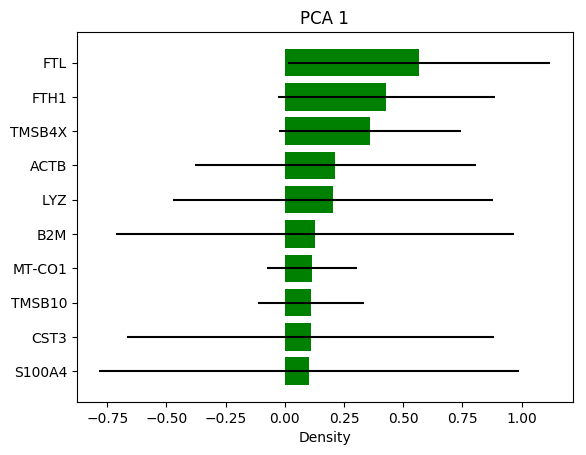

In [65]:
X_mat_red = run_pca(matrix_data = mat, components= 6)


In [6]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math as m
import matplotlib.ticker as ticker

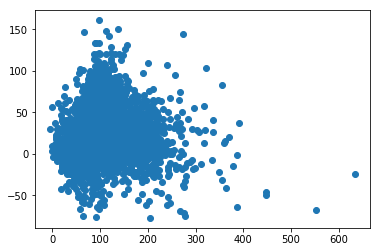

In [8]:
fig, ax = plt.subplots()
ax.scatter(np.array(X_mat_red[1][:,1]) , np.array(X_mat_red[1][:,2]))
plt.show()

In [ ]:
vals = []

x_min = get_values(pca, 0, Idim_min[0])
vals.append([j for j in x_min])

x_rand = get_values(pca, 0, A1)
vals.append([k for k in x_rand])

x_max = get_values(pca, 0, np.flip(Idim_max[0], 0))
vals.append([i for i in x_max])

single_x = []
for arrs in vals:
    for elem in arrs:
        single_x.append(elem)

tgs = []
tgs.append(get_tags(list_of_indexes=Idim_min[0]))
tgs.append(get_tags(A1))
tgs.append(get_tags(list_of_indexes=Idim_max[0]))

counter = 0
single_tags = []

for arrs in tgs:
        for elems in arrs:
            single_tags.append(elems)
            counter += 1



fig, ax = plt.subplots()
for color in ['red', 'green', 'blue']:
    
    if color == "blue":
        x = x_max
        y = y = [(15+i) for i in range(5)]
    elif color == "green":
        x = x_rand
        y = [(5+i) for i in range(10)]
    else:
        x = x_min
        y = [i for i in range(5)]
        
    ax.scatter(x , y  , s=100, alpha=0.5, c = color, edgecolors='none')

plt.yticks([i for i in range(counter)], single_tags)
ax.set_title("PCA 1")
ax.grid(True)


plt.show()

In [ ]:
vals = []

x_min = get_values(pca, 1, Idim_min[1])
vals.append([j for j in x_min])

x_rand = get_values(pca, 1, A1)
vals.append([k for k in x_rand])

x_max = get_values(pca, 1, np.flip(Idim_max[1], 0))
vals.append([i for i in x_max])

single_x = []
for arrs in vals:
    for elem in arrs:
        single_x.append(elem)

tgs = []
tgs.append(get_tags(list_of_indexes=Idim_min[1]))
tgs.append(get_tags(A1))
tgs.append(get_tags(list_of_indexes=Idim_max[1]))

counter = 0
single_tags = []

for arrs in tgs:
        for elems in arrs:
            single_tags.append(elems)
            counter += 1



fig, ax = plt.subplots()
for color in ['red', 'green', 'blue']:
    
    if color == "blue":
        x = x_max
        y = y = [(15+i) for i in range(5)]
    elif color == "green":
        x = x_rand
        y = [(5+i) for i in range(10)]
    else:
        x = x_min
        y = [i for i in range(5)]
        
    ax.scatter(x , y  , s=100, alpha=0.5, c = color, edgecolors='none')

plt.yticks([i for i in range(counter)], single_tags)
ax.set_title("PCA 2")
ax.grid(True)


plt.show()

In [ ]:
vals = []

x_min = get_values(pca, 2, Idim_min[2])
vals.append([j for j in x_min])

x_rand = get_values(pca, 2, A1)
vals.append([k for k in x_rand])

x_max = get_values(pca, 2, np.flip(Idim_max[2], 0))
vals.append([i for i in x_max])

single_x = []
for arrs in vals:
    for elem in arrs:
        single_x.append(elem)

tgs = []
tgs.append(get_tags(list_of_indexes=Idim_min[2]))
tgs.append(get_tags(A1))
tgs.append(get_tags(list_of_indexes=Idim_max[2]))

counter = 0
single_tags = []

for arrs in tgs:
        for elems in arrs:
            single_tags.append(elems)
            counter += 1



fig, ax = plt.subplots()
for color in ['red', 'green', 'blue']:
    
    if color == "blue":
        x = x_max
        y = y = [(15+i) for i in range(5)]
    elif color == "green":
        x = x_rand
        y = [(5+i) for i in range(10)]
    else:
        x = x_min
        y = [i for i in range(5)]
        
    ax.scatter(x , y  , s=100, alpha=0.5, c = color, edgecolors='none')

plt.yticks([i for i in range(counter)], single_tags)
ax.set_title("PCA 3")
ax.grid(False)


plt.show()


In [ ]:
PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
      svd_solver='randomized', tol=0.0, whiten=False)

In [ ]:
# np.sort 

In [ ]:
# 1 - Heat map, compare PCAs 
# 2 - 